### COVID-19 Analysis

In December 2019, a novel coronavirus known as SARS-CoV-2 (“the virus”) was first detected in Wuhan, Hubei Province, People's Republic of China, causing outbreaks of the coronavirus disease COVID-19 that spread globally. On March 11, 2020, the World Health Organization announced the COVID-19 outbreak can be characterized as a pandemic, as the rates of infection continued to rise in many locations around the world and across the United States. Following thereafter, the COVID-19 outbreak in the United States was declared a national emergency. As a result, states across the country followed suit and began implementing economy shutdowns and stay at home owners. Two states in particular, California and Florida, had different approaches to handling the pandemic and received criticism from both political sides.

The following project will be an analysis of the number of cases and deaths of the two states throughout the pandemic.

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

The COVID-19 data was obtained from the New York Times COVID-19 github repository (https://github.com/nytimes/covid-19-data).

### Data Exploration

We begin the data exploration by looking at some basic preliminary information of the dataset. The data is in chronological order and contains the cumulative number of cases and deaths per state on the specified date.

In [2]:
df = pd.read_csv("us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


There are 56,454 entries in the DataFrame with cases and deaths as data type int and date/state attributes are string objects.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56454 entries, 0 to 56453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    56454 non-null  object
 1   state   56454 non-null  object
 2   fips    56454 non-null  int64 
 3   cases   56454 non-null  int64 
 4   deaths  56454 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [4]:
df.describe()

,fips,cases,deaths
count,56454.000000,5.645400e+04,56454.000000
mean,32.219984,7.991679e+05,10987.214245
std,18.776792,1.344687e+06,16445.595871
min,1.000000,1.000000e+00,0.000000
25%,17.000000,6.000575e+04,1014.000000
50%,31.000000,3.124365e+05,4554.000000
75%,46.000000,9.365128e+05,13889.000000
max,78.000000,1.168506e+07,100350.000000


To have better usability with the date column, it is converted to a date time object.

In [5]:
# df['date'] = df.apply()
df['date'] = df["date"].map(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56454 entries, 0 to 56453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    56454 non-null  datetime64[ns]
 1   state   56454 non-null  object        
 2   fips    56454 non-null  int64         
 3   cases   56454 non-null  int64         
 4   deaths  56454 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ MB


In addition the date column will be split into unique years for comparisons.

In [7]:
# Convert date to year
df["year"] = df['date'].map(lambda x: x.year)

df.head()

,date,state,fips,cases,deaths,year
0,2020-01-21,Washington,53,1,0,2020
1,2020-01-22,Washington,53,1,0,2020
2,2020-01-23,Washington,53,1,0,2020
3,2020-01-24,Illinois,17,1,0,2020
4,2020-01-24,Washington,53,1,0,2020


Reordering the year attribute to the second column for ease of viewing and performing a check to insure there are no missing values in the DataFrame.

In [8]:
df = df[['date', 'year','state','fips','cases','deaths']]
df.head()

,date,year,state,fips,cases,deaths
0,2020-01-21,2020,Washington,53,1,0
1,2020-01-22,2020,Washington,53,1,0
2,2020-01-23,2020,Washington,53,1,0
3,2020-01-24,2020,Illinois,17,1,0
4,2020-01-24,2020,Washington,53,1,0


In [9]:
# Count the value of NAN values
nan_vals = df.isnull().sum().sum()
print(f'There are {nan_vals} NAN values in the data frame.')
#  there are no nan values

There are 0 NAN values in the data frame.


Since the DataFrame contains all states, we will proceed by splitting the DataFrame into two distinct DataFrames; CA for California and FL for Florida. In addition, for each new DataFrame two new attributes will be created. The new attributes are cases per day and deaths per day which will take the difference of cases and deaths respectively per consecutive dates.

In [10]:
# CA dataframe
import warnings

with warnings.catch_warnings(record=True):
# Diff method calculates difference between two consecutive rows.
# Filling in any missing values i.e. first row with zero
# Abs method used to take the absolute value for any difference that is negative which occurs when smaller number is taken from larger number.
    CA = df[df['state'] == 'California']
    CA['cases per day'] = CA['cases'].diff().fillna(0).abs()
    CA['deaths per day'] = CA['deaths'].diff().fillna(0).abs()
    # FL dataframe
    FL = df[df['state'] == 'Florida']
    FL['cases per day'] = FL['cases'].diff().fillna(0).abs()
    FL['deaths per day'] = FL['deaths'].diff().fillna(0).abs()

In [11]:
CA.head()

,date,year,state,fips,cases,deaths,cases per day,deaths per day
5,2020-01-25,2020,California,6,1,0,0.0,0.0
9,2020-01-26,2020,California,6,2,0,1.0,0.0
13,2020-01-27,2020,California,6,2,0,0.0,0.0
17,2020-01-28,2020,California,6,2,0,0.0,0.0
21,2020-01-29,2020,California,6,2,0,0.0,0.0


In [12]:
FL.head()

,date,year,state,fips,cases,deaths,cases per day,deaths per day
242,2020-03-01,2020,Florida,12,2,0,0.0,0.0
255,2020-03-02,2020,Florida,12,2,0,0.0,0.0
270,2020-03-03,2020,Florida,12,3,0,1.0,0.0
286,2020-03-04,2020,Florida,12,3,0,0.0,0.0
304,2020-03-05,2020,Florida,12,4,0,1.0,0.0


Looking at the following statistics for both California and Florida, it is worth noting the mean is 97 and 82 deaths per day, respectively.

In [13]:
CA.describe()

,year,fips,cases,deaths,cases per day,deaths per day
count,1056.000000,1056.0,1.056000e+03,1056.000000,1056.000000,1056.000000
mean,2021.006629,6.0,4.868602e+06,54422.075758,11068.437500,96.871212
std,0.809279,0.0,3.966698e+06,34857.753851,21305.623596,142.645859
min,2020.000000,6.0,1.000000e+00,0.000000,0.000000,0.000000
25%,2020.000000,6.0,8.695585e+05,16817.250000,1420.000000,19.000000
50%,2021.000000,6.0,3.871263e+06,63709.500000,4187.000000,62.000000
75%,2022.000000,6.0,9.088616e+06,88708.250000,10602.750000,115.000000
max,2022.000000,6.0,1.168506e+07,100350.000000,227972.000000,2363.000000


In [14]:
FL.describe()

,year,fips,cases,deaths,cases per day,deaths per day
count,1020.000000,1020.0,1.020000e+03,1020.000000,1020.000000,1020.000000
mean,2021.042157,12.0,3.273383e+06,43465.861765,7164.634314,81.596078
std,0.800630,0.0,2.500852e+06,28271.574970,12960.861454,139.018943
min,2020.000000,12.0,2.000000e+00,0.000000,0.000000,0.000000
25%,2020.000000,12.0,8.565445e+05,17286.000000,776.750000,0.000000
50%,2021.000000,12.0,2.479975e+06,38670.000000,3389.000000,46.000000
75%,2022.000000,12.0,5.855701e+06,73409.500000,8855.250000,98.250000
max,2022.000000,12.0,7.226875e+06,83200.000000,193786.000000,1554.000000


### Data Visualization


Below are line plots of the cumulative cases and deaths for both states respectively. Take notice when there is a spike in cases, there is also a spike in deaths. The steepest spikes also occur yearly in the winter months. 

Text(0, 0.5, 'Cases')

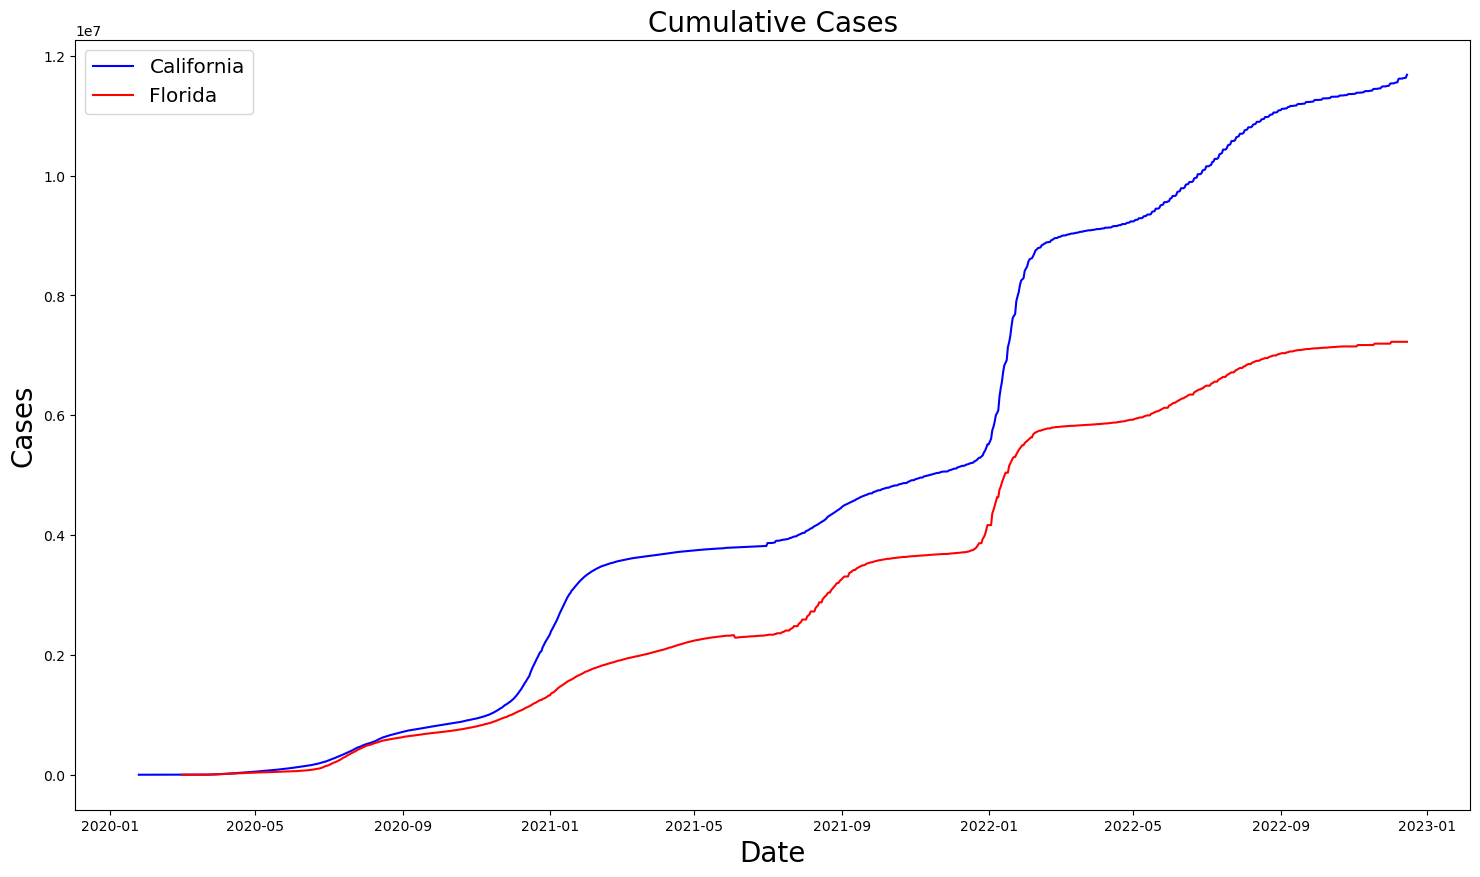

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))

b=sns.lineplot(data=CA, x="date", y="cases", color='blue', ax=ax)
b=sns.lineplot(data=FL, x="date", y="cases", color = 'red', ax=ax)
plt.legend(labels=['California', 'Florida'],fontsize='x-large')
b.axes.set_title("Cumulative Cases",fontsize=20)
b.set_xlabel("Date",fontsize=20)
b.set_ylabel("Cases",fontsize=20)

Text(0, 0.5, 'Deaths')

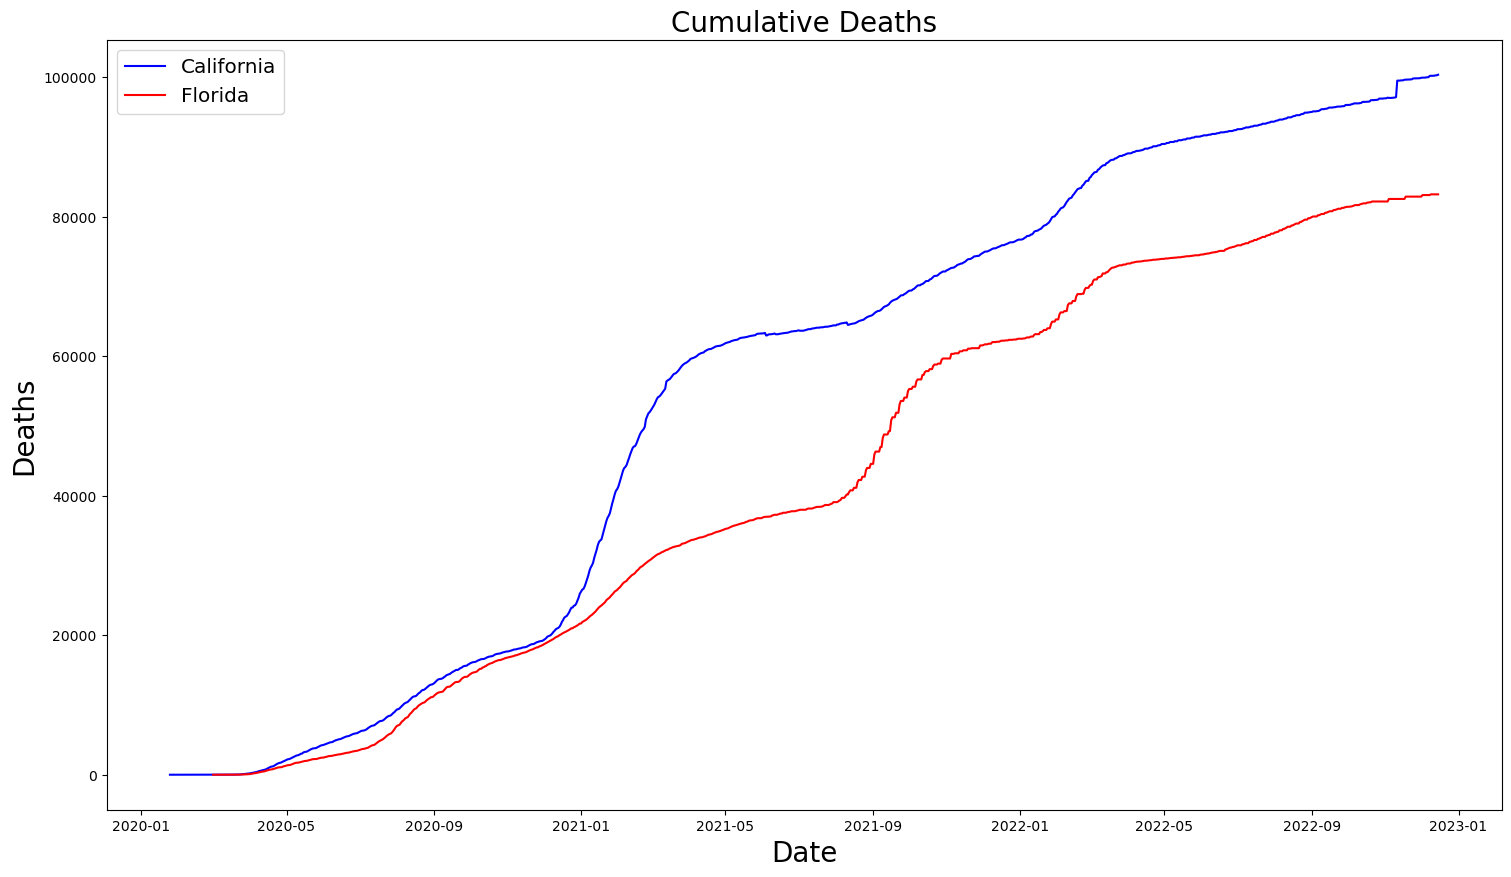

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))

b=sns.lineplot(data=CA, x="date", y="deaths", color='blue', ax=ax)
b=sns.lineplot(data=FL, x="date", y="deaths", color = 'red', ax=ax)
plt.legend(labels=['California', 'Florida'],fontsize='x-large')
b.axes.set_title("Cumulative Deaths",fontsize=20)
b.set_xlabel("Date",fontsize=20)
b.set_ylabel("Deaths",fontsize=20)

For a large majority of California, the economy did not fully reopen until June 15, 2021, which formally lifted the stay at home order and Blueprint for a safer economy tier system.
Some major key restrictions that ended on June 15, 2021 included:

Physical distancing,
Capacity limits on businesses,
and the County tier system.


Florida's economy, on the other hand, reopened much earlier than California. On September 25, 2020, Florida officially reopened its economy. 

The following plots below are of cases and deaths per date.

Text(0, 0.5, 'Cases')

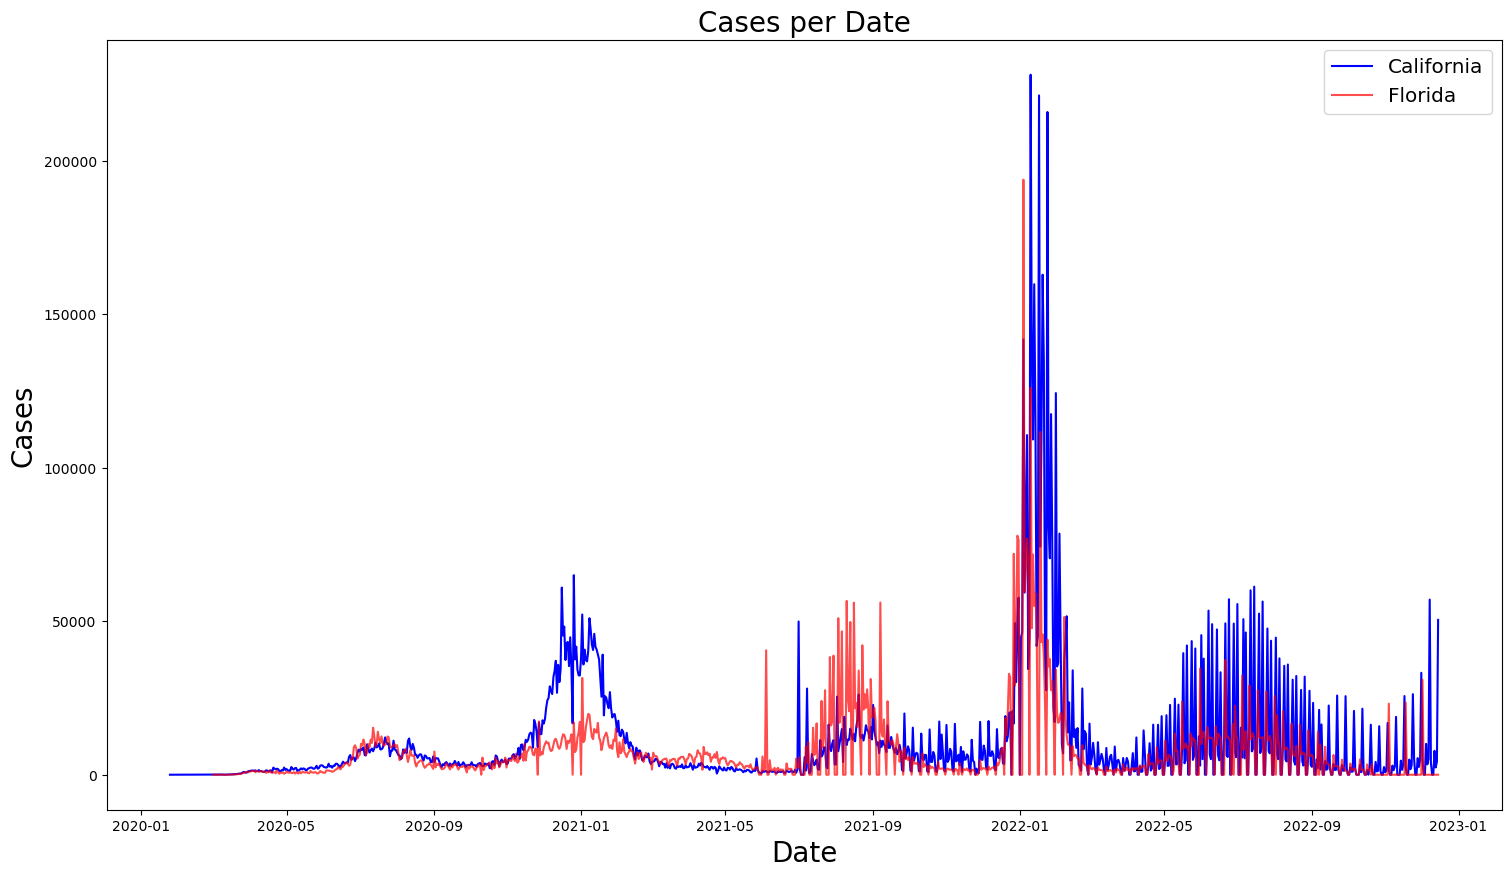

In [17]:
fig, ax = plt.subplots(figsize=(18, 10))

b=sns.lineplot(data=CA, x="date", y="cases per day", color='blue', ax=ax)
b=sns.lineplot(data=FL, x="date", y="cases per day", color = 'red', ax=ax, alpha=0.7)
plt.legend(labels=['California', 'Florida'], fontsize='x-large')
b.axes.set_title("Cases per Date",fontsize=20)
b.set_xlabel("Date",fontsize=20)
b.set_ylabel("Cases",fontsize=20)

The following plot below of deaths per day appears to have an outlier for California around November 2022. 

Text(0, 0.5, 'Deaths')

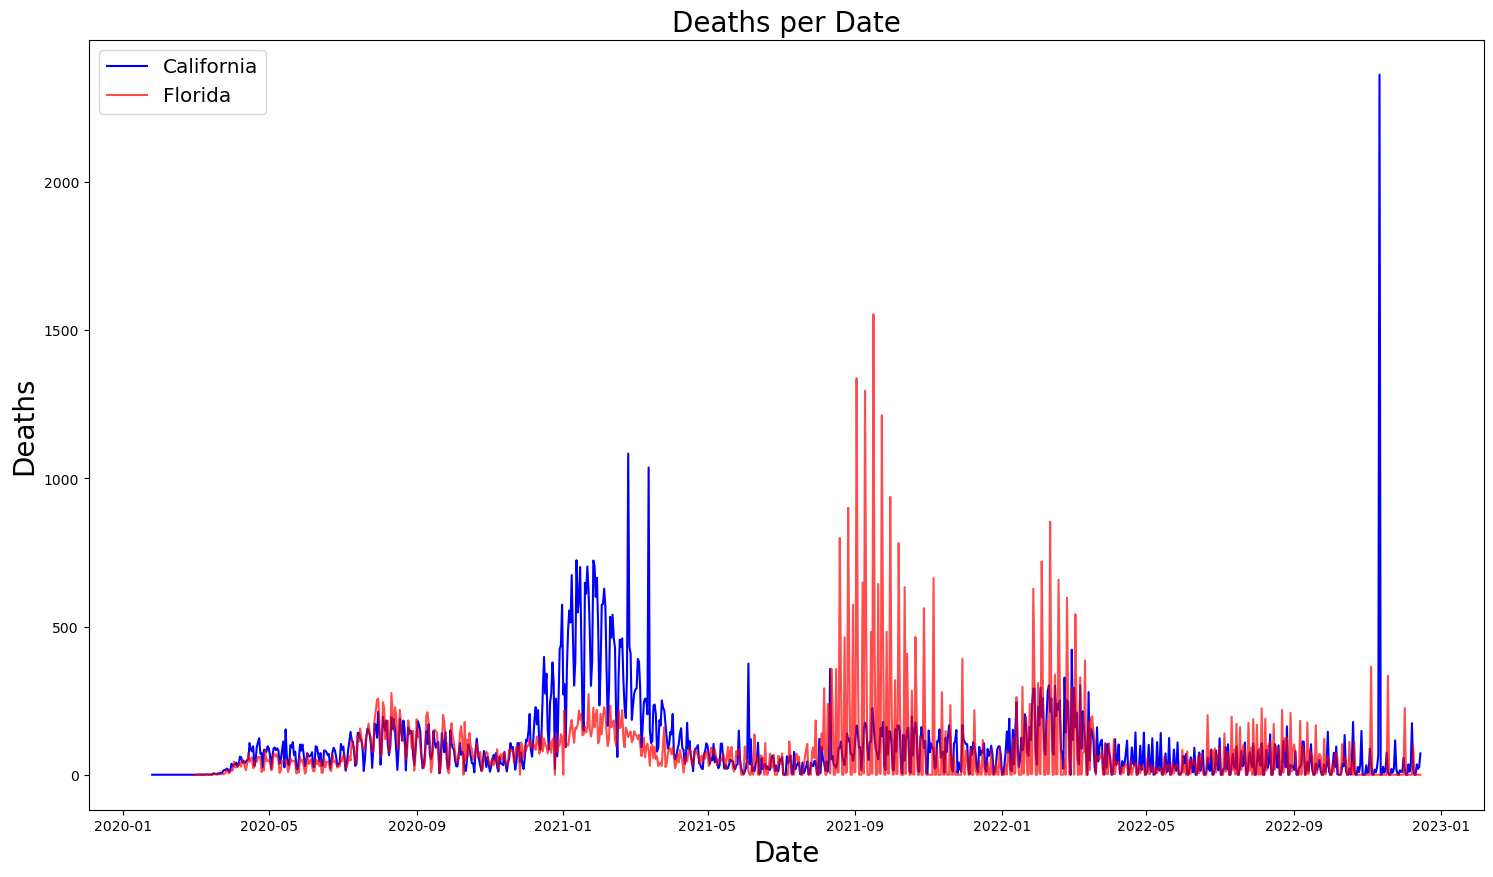

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))

b=sns.lineplot(data=CA, x="date", y="deaths per day", color='blue', ax=ax)
b=sns.lineplot(data=FL, x="date", y="deaths per day", color = 'red', ax=ax,alpha=0.7)
plt.legend(labels=['California', 'Florida'], fontsize='x-large')
b.axes.set_title("Deaths per Date",fontsize=20)
b.set_xlabel("Date",fontsize=20)
b.set_ylabel("Deaths",fontsize=20)

There appears to be an outlier for California around November 11, 2022, as there is a large spike in deaths per day compared to near previous dates.

In [19]:
mask = CA['deaths per day'] > 1500
CA[mask]


,date,year,state,fips,cases,deaths,cases per day,deaths per day
54499,2022-11-11,2022,California,6,11411450,99505,2.0,2363.0


The week's average deaths per day in California around November 11, 2022 is 38 deaths. It is very likely the value of 2363 is incorrect and will be replaced with the week's average.

In [20]:
CA.loc[54499,'deaths per day'] = 38

Text(0, 0.5, 'Deaths')

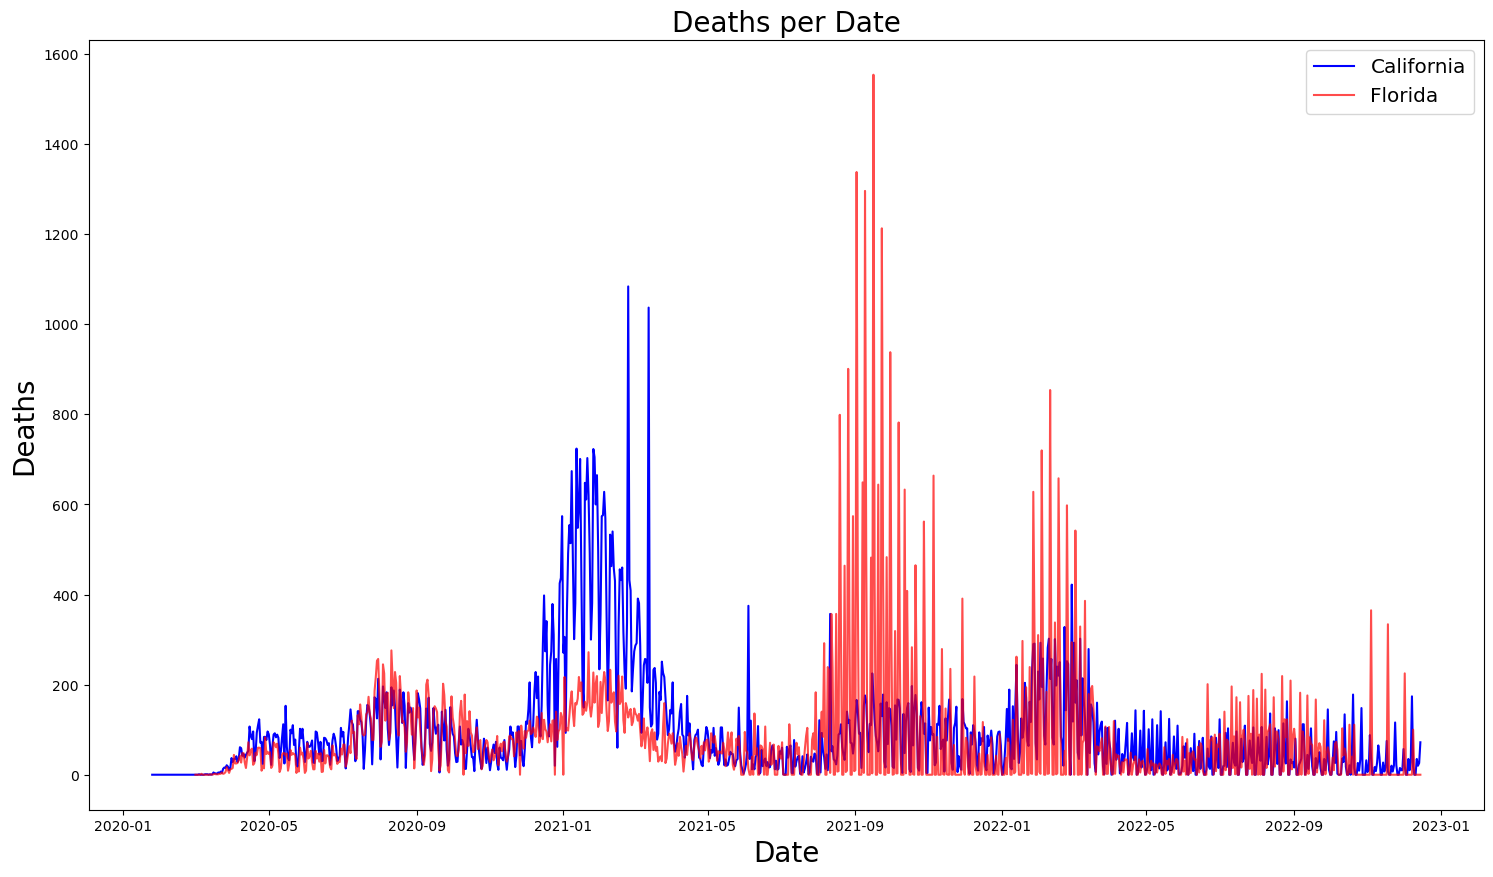

In [21]:
fig, ax = plt.subplots(figsize=(18, 10))

b=sns.lineplot(data=CA, x="date", y="deaths per day", color='blue', ax=ax)
b=sns.lineplot(data=FL, x="date", y="deaths per day", color = 'red', ax=ax,alpha=0.7)
plt.legend(labels=['California', 'Florida'], fontsize='x-large')
b.axes.set_title("Deaths per Date",fontsize=20)
b.set_xlabel("Date",fontsize=20)
b.set_ylabel("Deaths",fontsize=20)

During winter of 2021, California had much higher deaths per day than Florida. However, the following year Florida had much higher deaths per day than California.

The Food and Drug Administration (FDA) first granted emergency use authorization to the Pfizer–BioNTech vaccine on December 10, 2020,[6] and mass vaccinations began four days later. The Moderna vaccine was granted emergency use authorization on December 17, 2020,[7] and the Janssen (Johnson & Johnson) vaccine was granted emergency use authorization on February 27, 2021.

In [22]:
# Calculating mean deaths over whole pandemic period and average per regulation/restriction time period for A/B experimental parametric testing.

CA_total_mean = round(CA['deaths per day'].mean(),2)

print(f'The average number of deaths per day in California over the course of the pandemic was {CA_total_mean}.')
print('\n')

FL_total_mean = round(FL['deaths per day'].mean(),2)

print(f'On the other hand, the average number of deaths per day in Florida was {FL_total_mean}.')


The average number of deaths per day in California over the course of the pandemic was 94.67.


On the other hand, the average number of deaths per day in Florida was 81.6.


### Mortality Rates

Grouping the DataFrame per year will allow us to calculate the mortality rate of the virus for both states.

In [23]:
CA_2020 = CA[CA['year']==2020]
CA_2021 = CA[CA['year']==2021]
CA_2022 = CA[CA['year']==2022]

CA_cases_2020 = CA_2020['cases'].max()
CA_cases_2021 = CA_2021['cases'].max() - CA_cases_2020
CA_cases_2022 = CA_2022['cases'].max() - CA_cases_2021

CA_deaths_2020 = CA_2020['deaths'].max()
CA_deaths_2021 = CA_2021['deaths'].max() - CA_deaths_2020
CA_deaths_2022 = CA_2022['deaths'].max() - CA_deaths_2021

In [24]:
FL_2020 = FL[FL['year']==2020]
FL_2021 = FL[FL['year']==2021]
FL_2022 = FL[FL['year']==2022]

FL_cases_2020 = FL_2020['cases'].max()
FL_cases_2021 = FL_2021['cases'].max() - FL_cases_2020
FL_cases_2022 = FL_2022['cases'].max() - FL_cases_2021

FL_deaths_2020 = FL_2020['deaths'].max()
FL_deaths_2021 = FL_2021['deaths'].max() - FL_deaths_2020
FL_deaths_2022 = FL_2022['deaths'].max() - FL_deaths_2021

In [25]:
print(f"In 2020, there were {CA_cases_2020} confirmed cases in California, and of those confirmed cases {CA_deaths_2020} deaths documented with a mortality rate of {round((CA_deaths_2020/CA_cases_2020),5) * 100}%.")
print('\n')
print(f"In 2021, there were {CA_cases_2021} confirmed cases in California, and of those confirmed cases {CA_deaths_2021} deaths documented with a mortality rate of {round((CA_deaths_2021/CA_cases_2021),5) * 100}%.")
print('\n')
print(f"In 2022, there were {CA_cases_2022} confirmed cases in California, and of those confirmed cases {CA_deaths_2022} deaths documented with a mortality rate of {round((CA_deaths_2022/CA_cases_2022),5) * 100}%.")


In 2020, there were 2307860 confirmed cases in California, and of those confirmed cases 25965 deaths documented with a mortality rate of 1.125%.


In 2021, there were 3207753 confirmed cases in California, and of those confirmed cases 50744 deaths documented with a mortality rate of 1.582%.


In 2022, there were 8477304 confirmed cases in California, and of those confirmed cases 49606 deaths documented with a mortality rate of 0.585%.


 -------------------------------------------------------------------------

In [26]:
print(f"In 2020, there were {FL_cases_2020} confirmed cases in Florida, and of those confirmed cases {FL_deaths_2020} deaths documented with a mortality rate of {round((FL_deaths_2020/FL_cases_2020),5) * 100}%.")
print('\n')
print(f"In 2021, there were {FL_cases_2021} confirmed cases in Florida, and of those confirmed cases {FL_deaths_2021} deaths documented with a mortality rate of {round((FL_deaths_2021/FL_cases_2021),5) * 100}%.")
print('\n')
print(f"In 2022, there were {FL_cases_2022} confirmed cases in Florida, and of those confirmed cases {FL_deaths_2022} deaths documented with a mortality rate of {round((FL_deaths_2022/FL_cases_2022),5) * 100}%.")


In 2020, there were 1323307 confirmed cases in Florida, and of those confirmed cases 21672 deaths documented with a mortality rate of 1.638%.


In 2021, there were 2843085 confirmed cases in Florida, and of those confirmed cases 40832 deaths documented with a mortality rate of 1.436%.


In 2022, there were 4383790 confirmed cases in Florida, and of those confirmed cases 42368 deaths documented with a mortality rate of 0.966%.


In [27]:
data = {'State':['California','Florida'],'Total Confirmed Cases':[CA['cases'].max(), FL['cases'].max()],'Total Confirmed Deaths':[CA['deaths'].max(),FL['deaths'].max()], 
       'Mortality Rate %': [round((CA['deaths'].max() / CA['cases'].max()) * 100,5), round((FL['deaths'].max() / FL['cases'].max()) * 100.5)], '% Population Fully Vacinated':[74,68],
       '% Population over age 65': [15.2, 21.3]}
# Fully Vacinated rates obtained from https://usafacts.org/visualizations/covid-vaccine-tracker-states/
mortality_df = pd.DataFrame(data)
mortality_df

,State,Total Confirmed Cases,Total Confirmed Deaths,Mortality Rate %,% Population Fully Vacinated,% Population over age 65
0,California,11685057,100350,0.85879,74,15.2
1,Florida,7226875,83200,1.00000,68,21.3


Comparing death rates between both states during the time of California's COVID restrictions. 

In [28]:
# create mask for dates to filter dataframe

CA_mask = (CA['date'] > '2020-03-01') & (CA['date'] <= '2021-06-15')
FL_mask = (FL['date'] > '2020-03-01') & (FL['date'] <= '2021-06-15')


### Parametric t-test

In order to compare means of two samples, we can use a parametric t-test with the condition that both samples must have similar variances.  

In [29]:
# Python program to display variance of data groups

# Import library
import scipy.stats as stats
CA_restricted = CA[CA_mask]['deaths per day']
FL_restricted = FL[FL_mask]['deaths per day']
# Creating data groups
data_group1 = np.array(CA_restricted)
data_group2 = np.array(FL_restricted)


# Print the variance of both data groups
print('The variances for the populations are: ')
print(f'{np.var(data_group1)} and {np.var(data_group2)}')
print(f'Because the variances are not the same, we can not perform a parametric two sample t-test to compare means.')

The variances for the populations are: 
25707.719375588822 and 3504.089424407571
Because the variances are not the same, we can not perform a parametric two sample t-test to compare means.


### Moods-Median Test

Because the samples are not normally distributed and the variances are different, we can use a non-parametric Moods-Median Test. The Moods-Median test is used to test the equality of medians from two or more populations.

H0. The null hypothesis for this test is that the medians are the same for both groups.

Ha. The alternate hypothesis for the test is that the medians are different for both groups.

In [30]:
g1 = CA['deaths per day'].array
g2 = FL['deaths per day'].array

from scipy.stats import median_test
stat, p, med, tbl = median_test(g1, g2)

print(f'The median is {med}')
print('\n')
print('The contingency table is')
print(f'{tbl}')
print('\n')
print(f'The p value is {round(p,4)}')
print('\n')
print(f'California had a median death per day of {np.median(g1)}')
print('\n')
print(f'Florida had a median death per day of {np.median(g2)}')

The median is 52.0


The contingency table is
[[558 474]
 [498 546]]


The p value is 0.0043


California had a median death per day of 61.5


Florida had a median death per day of 46.0


Since the p-value < 0.05 we reject the null hypothesis and conclude that not all the population medians are equal. Thus, California had a statistically higher median deaths per day during the pandemic as a whole.

Running Moods-Median test again using only dates during Californias Covid regulations yields similar results.

In [31]:
g1 = CA.loc[CA_mask]['deaths per day'].array
g2 = FL.loc[FL_mask]['deaths per day'].array
# print(f'The data type of g1 is {type(g1)}')
# print(f'The data type of g2 is {type(g1)}')

from scipy.stats import median_test
stat, p, med, tbl = median_test(g1, g2)

print(f'The median is {med}')
print('\n')
print('The contingency table is')
print(f'{tbl}')
print('\n')
print(f'The p value is {round(p,4)}')
print(f'California had a median death per day of {np.median(g1)}')
print('\n')
print(f'Florida had a median death per day of {np.median(g2)}')

The median is 76.0


The contingency table is
[[257 209]
 [214 262]]


The p value is 0.0022
California had a median death per day of 83.0


Florida had a median death per day of 68.0


### MANN-Kendall Trend Test

The Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It is a non-parametric test, meaning there is no underlying assumption made about the normality of the data.

This is a hypotheses test and the two hypotheses are as follows:

Ho(null hypothesis): There is no trend present in the data.(p-value>0.05).

Ha(alternative hypothesis): A trend is present in the data.

In [32]:
import pymannkendall as mk
 
CA_data = CA['deaths per day'].array
FL_data = FL['deaths per day'].array
# perform Mann-Kendall Trend Test
print('Performing the Mann-Kendall test on California deaths per date shows the trend is decreasing')
print('\n')
print(mk.original_test(CA_data))
print('\n')
print('Performing the Mann-Kendall test on Florida deaths per date shows the trend is also decreasing')
print('\n')
print(mk.original_test(FL_data))

Performing the Mann-Kendall test on California deaths per date shows the trend is decreasing


Mann_Kendall_Test(trend='decreasing', h=True, p=1.1278877998233128e-06, z=-4.867902795438511, Tau=-0.09996948154531093, s=-55687.0, var_s=130860402.33333333, slope=-0.02693103317790606, intercept=75.70612000134545)


Performing the Mann-Kendall test on Florida deaths per date shows the trend is also decreasing


Mann_Kendall_Test(trend='decreasing', h=True, p=1.5543122344752192e-15, z=-7.981321209552665, Tau=-0.16549481421616732, s=-86006.0, var_s=116117538.66666667, slope=-0.025477707006369428, intercept=58.98089171974522)


Both p-values are < 0.05 and thus we reject the null hypothesis, and as a result, there is a decreasing trend in both California and Florida deaths per day.

### ARIMA Model

ARIMA models are a widely used statistical method for time series forecasting.
For the purpose of this model, we will be forecasting both states number of deaths per day for 30 days. 

We will begin with California by setting the Date column as the index and are only concerned with the deaths per day attribute.

In [33]:
df = CA[['date','deaths per day']]
df.set_index('date',inplace=True)
df = df[~(df == 0).any(axis=1)]
df.head()


,deaths per day
date,
2020-03-04,1.0
2020-03-09,1.0
2020-03-10,1.0
2020-03-11,1.0
2020-03-13,1.0


Linear plot visualization of the deaths per day.

<AxesSubplot:xlabel='date'>

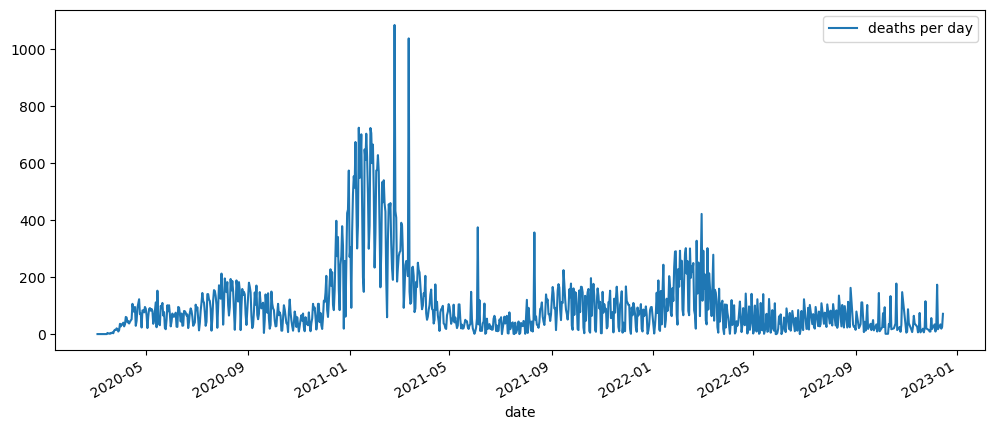

In [34]:
df.plot(figsize=(12,5))

In [35]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of lags : ', dftest[2])
    print('4. Num of observations used for ADF Regression and Critical Values Calculation : ', dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [36]:
ad_test(df['deaths per day'])

1. ADF :  -2.5564561254258806
2. P-Value :  0.10233493342623412
3. Num of lags :  22
4. Num of observations used for ADF Regression and Critical Values Calculation :  920
5. Critical Values :
	 1% :  -3.4374778690219956
	 5% :  -2.864686684217556
	 10% :  -2.5684454926748583


In [37]:
from pmdarima import auto_arima
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Fitting many different ARIMA models to minimize aic.

In [38]:
stepwise_fit = auto_arima(df['deaths per day'],trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10891.950, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11262.827, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11154.727, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10928.385, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11260.828, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10889.733, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10895.005, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10899.181, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10898.237, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10896.967, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10888.987, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11116.916, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10844.045, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11070.668, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  943
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -5305.746
Date:                Fri, 30 Dec 2022   AIC                          10629.492
Time:                        21:49:28   BIC                          10673.124
Sample:                             0   HQIC                         10646.123
                                - 943                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1977      0.551     -0.359      0.720      -1.277       0.882
ar.L1          0.9895      0.040     24.970      0.000       0.912       1.067
ar.L2         -0.8560      0.047    -18.118      0.000      -0.949      -0.763
ar.L3         -0.0133      0.043     -0.309      0.758      -0.098       0.071
ar.L4         -0.1828      0.030     -6.170      0.000      -0.241      -0.125
ma.L1         -1.8549      0.037    -50.720      0.000      -1.927      -1.783
ma.L2          1.6528      0.053     31.250      0.000       1.549       1.756
ma.L3         -0.6045      0.033    -18.425      0.000      -0.669      -0.540
sigma2      4592.1430     76.848     59.756      0.000    4441.523    4742.763
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             58393.00
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             3.37
Prob(H) (two-sided):                  0.52   Kurtosis:                        40.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best model to use is Arima (4,1,3).

In [39]:
import statsmodels.api as sm

### Split data into training and testing

In [40]:
print(df.shape)
train = df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(943, 1)
(913, 1) (30, 1)


### Train the model

In [41]:
model = sm.tsa.arima.ARIMA(train['deaths per day'],order =(4,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         deaths per day   No. Observations:                  913
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -5146.135
Date:                Fri, 30 Dec 2022   AIC                          10308.269
Time:                        21:49:28   BIC                          10346.794
Sample:                             0   HQIC                         10322.977
                                - 913                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9914      0.039     25.708      0.000       0.916       1.067
ar.L2         -0.8538      0.047    -18.274      0.000      -0.945      -0.762
ar.L3         -0.0184      0.043     -0.432      0.666      -0.102       0.065
ar.L4         -0.1788      0.029     -6.170      0.000      -0.236      -0.122
ma.L1         -1.8486      0.037    -50.610      0.000      -1.920      -1.777
ma.L2          1.6468      0.053     31.256      0.000       1.544       1.750
ma.L3         -0.5976      0.033    -18.077      0.000      -0.662      -0.533
sigma2      4630.4674     65.569     70.620      0.000    4501.954    4758.981
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             56635.04
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make predictions on test set

In [42]:
start = len(train)
end = len(train)+len(test)-1
pred= model.predict(start=start,end=end,typ='levels')
# print(pred)
pred.index=df.index[start:end+1]
print(pred)

date
2022-11-04    40.279923
2022-11-07    48.194788
2022-11-08    61.292929
2022-11-09    54.450045
2022-11-10    44.872386
2022-11-11    39.562616
2022-11-14    40.259279
2022-11-15    46.883574
2022-11-16    54.666694
2022-11-17    57.663836
2022-11-18    53.743479
2022-11-21    45.969934
2022-11-22    40.163330
2022-11-23    40.579844
2022-11-24    46.794643
2022-11-25    54.097477
2022-11-28    57.062117
2022-11-29    53.577237
2022-11-30    46.345250
2022-12-01    40.790229
2022-12-02    40.991580
2022-12-05    46.690415
2022-12-06    53.563947
2022-12-07    56.502470
2022-12-08    53.406214
2022-12-09    46.681983
2022-12-12    41.375803
2022-12-13    41.387852
2022-12-14    46.607705
2022-12-15    53.072612
Name: predicted_mean, dtype: float64


As follows is a plot of the predicted mean and deaths per day.

<AxesSubplot:xlabel='date'>

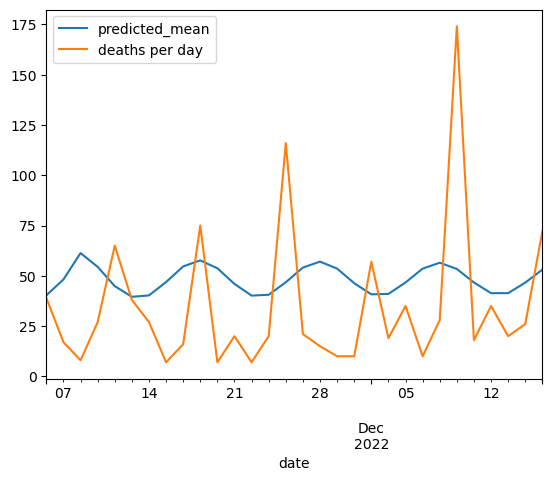

In [43]:
pred.plot(legend=True)
test['deaths per day'].plot(legend=True)

In [44]:
test['deaths per day'].mean()

34.63333333333333

### Root Mean Squared Error

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['deaths per day']))
print(rmse)

38.312155839101735


Not a very good model since RMSE is similar to the mean of the data but will continue building ARIMA model.

In [46]:
model2=sm.tsa.arima.ARIMA(df['deaths per day'],order =(4,1,3))
model2=model2.fit()
df.tail() # where data set ends

,deaths per day
date,
2022-12-09,18.0
2022-12-12,35.0
2022-12-13,20.0
2022-12-14,26.0
2022-12-15,72.0


The ARIMA models predicted California deaths per day 30 days forecasted.

In [47]:
pred = model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
index_future_dates = pd.date_range(start='2022-12-15', end='2023-01-14')

pred.index=index_future_dates
print(pred)

2022-12-15    53.984175
2022-12-16    56.628067
2022-12-17    53.728920
2022-12-18    40.754185
2022-12-19    33.482688
2022-12-20    36.962620
2022-12-21    47.474892
2022-12-22    57.441805
2022-12-23    59.572386
2022-12-24    52.286696
2022-12-25    41.100358
2022-12-26    34.379882
2022-12-27    37.065083
2022-12-28    47.057508
2022-12-29    56.856214
2022-12-30    59.184514
2022-12-31    52.393782
2023-01-01    41.627476
2023-01-02    34.926370
2023-01-03    37.224111
2023-01-04    46.716141
2023-01-05    56.273338
2023-01-06    58.795584
2023-01-07    52.485663
2023-01-08    42.126706
2023-01-09    35.457666
2023-01-10    37.392463
2023-01-11    46.400434
2023-01-12    55.713346
2023-01-13    58.409941
2023-01-14    52.558944
Freq: D, Name: ARIMA Predictions, dtype: float64


Plot of California's forecasted deaths per day.

<AxesSubplot:>

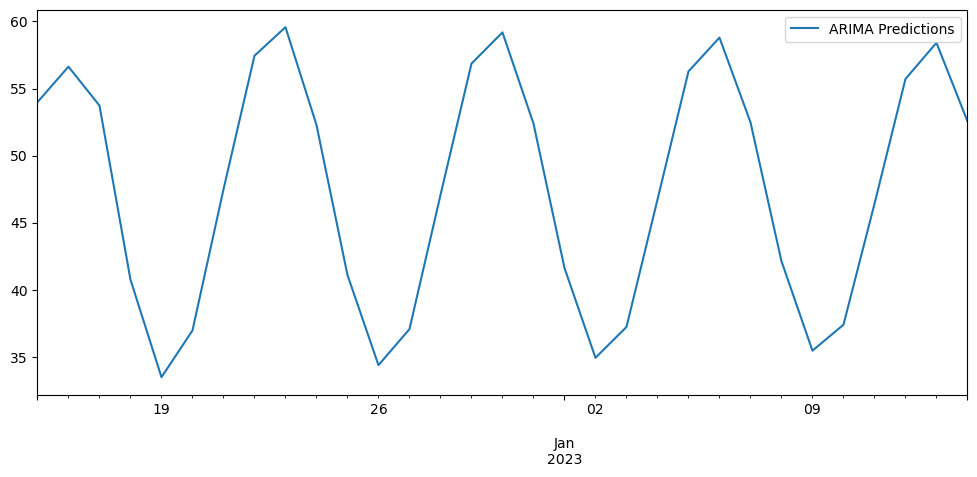

In [48]:
pred.plot(figsize=(12,5),legend=True)

Continuing the same ARIMA model building process for Florida's deaths per day.

In [49]:
df = FL[['date','deaths per day']]
df.set_index('date',inplace=True)
df = df[~(df == 0).any(axis=1)]
df.head()

,deaths per day
date,
2020-03-06,2.0
2020-03-14,1.0
2020-03-16,1.0
2020-03-17,2.0
2020-03-18,1.0


<AxesSubplot:xlabel='date'>

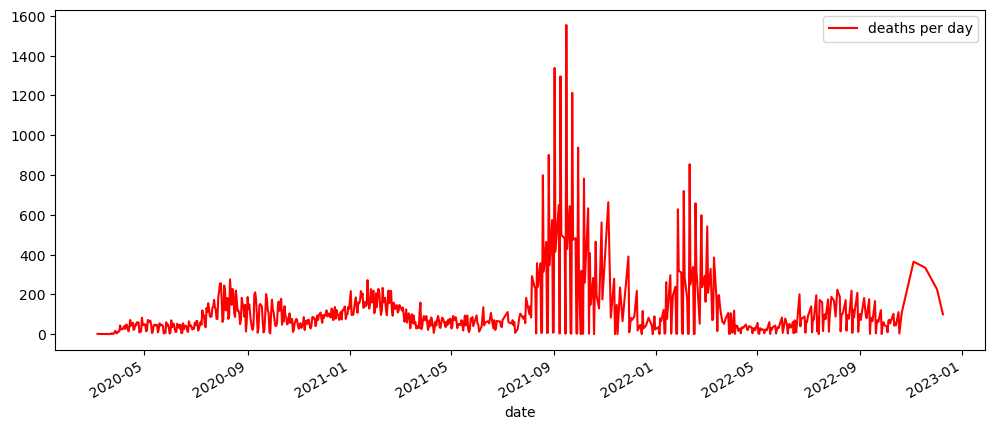

In [50]:
df.plot(figsize=(12,5), color='red')

In [51]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of lags : ', dftest[2])
    print('4. Num of observations used for ADF Regression and Critical Values Calculation : ', dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [52]:
ad_test(df['deaths per day'])

1. ADF :  -4.007511545419816
2. P-Value :  0.0013716853286181204
3. Num of lags :  15
4. Num of observations used for ADF Regression and Critical Values Calculation :  744
5. Critical Values :
	 1% :  -3.4391698996357687
	 5% :  -2.8654325580580204
	 10% :  -2.568842816582842


In [53]:
from pmdarima import auto_arima
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
stepwise_fit = auto_arima(df['deaths per day'],trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9413.300, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10090.821, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9810.278, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9542.949, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10088.822, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9416.737, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9505.639, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9377.161, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9412.331, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9348.754, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9346.916, Time=0.54 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9371.570, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9348.449, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9603.423, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  760
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -4666.535
Date:                Fri, 30 Dec 2022   AIC                           9345.071
Time:                        21:49:38   BIC                           9372.863
Sample:                             0   HQIC                          9355.774
                                - 760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7905      0.027    -29.401      0.000      -0.843      -0.738
ar.L2         -0.6661      0.023    -29.286      0.000      -0.711      -0.621
ar.L3         -0.6981      0.021    -33.197      0.000      -0.739      -0.657
ar.L4         -0.4038      0.015    -26.075      0.000      -0.434      -0.373
ma.L1         -0.3657      0.028    -13.191      0.000      -0.420      -0.311
sigma2      1.278e+04    234.339     54.522      0.000    1.23e+04    1.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10479.07
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               6.62   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
import statsmodels.api as sm

In [56]:
print(df.shape)
train = df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(760, 1)
(730, 1) (30, 1)


In [57]:
model = sm.tsa.arima.ARIMA(train['deaths per day'],order =(4,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         deaths per day   No. Observations:                  730
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -4486.012
Date:                Fri, 30 Dec 2022   AIC                           8984.024
Time:                        21:49:38   BIC                           9011.574
Sample:                             0   HQIC                          8994.654
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7877      0.027    -29.406      0.000      -0.840      -0.735
ar.L2         -0.6653      0.023    -28.799      0.000      -0.711      -0.620
ar.L3         -0.6970      0.022    -32.011      0.000      -0.740      -0.654
ar.L4         -0.4015      0.016    -25.292      0.000      -0.433      -0.370
ma.L1         -0.3903      0.028    -14.110      0.000      -0.445      -0.336
sigma2      1.291e+04    240.463     53.696      0.000    1.24e+04    1.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9947.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.21   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
start = len(train)
end = len(train)+len(test)-1
pred= model.predict(start=start,end=end,typ='levels')
# print(pred)
pred.index=df.index[start:end+1]
print(pred)

date
2022-09-14    156.252888
2022-09-15     90.311234
2022-09-16    122.772872
2022-09-19    103.412542
2022-09-20     81.099881
2022-09-21    115.403827
2022-09-22    103.688403
2022-09-23    113.419980
2022-09-26     98.595919
2022-09-27     98.192268
2022-09-28    106.292887
2022-09-29    106.606133
2022-09-30    107.203059
2022-10-03    101.040204
2022-10-04    102.027057
2022-10-05    104.807942
2022-10-06    106.016854
2022-10-07    105.000895
2022-10-11    102.662365
2022-10-12    103.221251
2022-10-13    104.559597
2022-10-14    105.171439
2022-10-17    104.348415
2022-10-18    103.432432
2022-10-19    103.737725
2022-10-21    104.434658
2022-11-04    104.651455
2022-11-18    104.171973
2022-12-02    103.797088
2022-12-09    103.980466
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='date'>

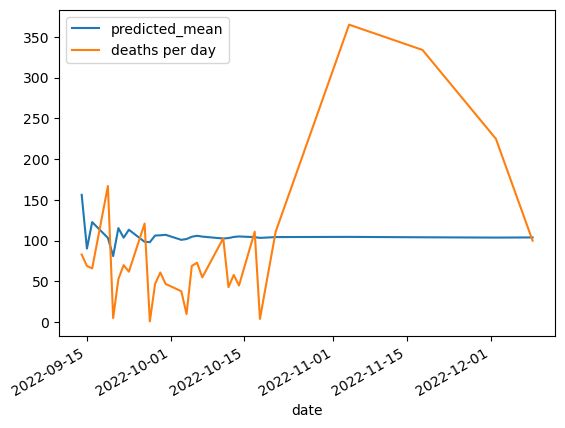

In [59]:
pred.plot(legend=True)
test['deaths per day'].plot(legend=True)

In [60]:
test['deaths per day'].mean()

87.86666666666666

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['deaths per day']))
print(rmse)

85.98348349954459


In [62]:
model2=sm.tsa.arima.ARIMA(df['deaths per day'],order =(4,1,1))
model2=model2.fit()
df.tail() # where data set ends

,deaths per day
date,
2022-10-21,111.0
2022-11-04,365.0
2022-11-18,334.0
2022-12-02,225.0
2022-12-09,100.0


The ARIMA models predicted Floridas deaths per day 30 days forecasted.

In [63]:
pred = model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
index_future_dates = pd.date_range(start='2022-12-09', end='2023-01-08')

pred.index=index_future_dates
print(pred)

2022-12-09    171.374883
2022-12-10    286.820568
2022-12-11    279.296017
2022-12-12    208.995654
2022-12-13    160.167279
2022-12-14    204.228623
2022-12-15    254.035881
2022-12-16    247.788907
2022-12-17    208.509021
2022-12-18    191.158986
2022-12-19    215.286796
2022-12-20    237.713740
2022-12-21    231.887215
2022-12-22    211.717281
2022-12-23    206.143796
2022-12-24    218.995983
2022-12-25    228.981933
2022-12-26    224.562791
2022-12-27    214.683191
2022-12-28    213.275753
2022-12-29    220.021629
2022-12-30    224.307793
2022-12-31    221.398142
2023-01-01    216.702357
2023-01-02    216.636345
2023-01-03    220.116771
2023-01-04    221.862462
2023-01-05    220.106467
2023-01-06    217.928805
2023-01-07    218.195847
2023-01-08    219.956195
Freq: D, Name: ARIMA Predictions, dtype: float64


Plot of Florida's forecasted deaths per day.

<AxesSubplot:>

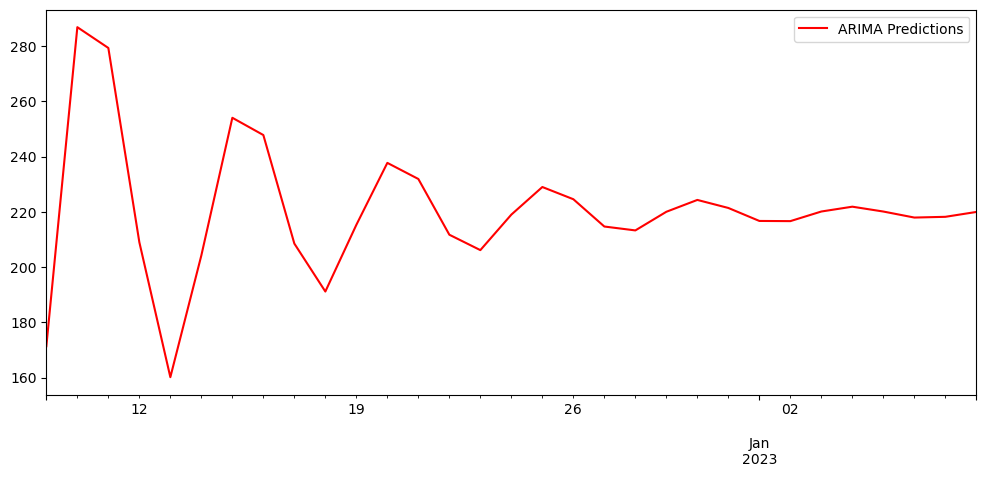

In [64]:
pred.plot(figsize=(12,5),legend=True, color='red')

### Conclusion

Over the course of the COVID-19 pandemic, California and Florida have received large criticism in regard to the strict restrictions and lack thereof for handling the virus outbreak among the states' populace. If one were to look strictly at the state with the fewer number of deaths, then Florida would be the successor. Additionally, California has nearly double the population of Florida.

It is also worth noting during the winter months, there were exponentially large spikes in the number of deaths. During the first winter, California saw much higher deaths than Florida. However, the following year, almost a year after the vaccines had been distributed to the mass population, Florida saw an exponentially large spike in numbers of deaths while California’s numbers were relatively lower. Other than the winter months, the deaths per state stayed relatively the same. It is likely the number of deaths for Florida during Fall and Winter of 2022 was higher than California due to the fact fewer people in Florida were fully vaccinated and the population over age 65 (high risk) was higher in Florida as well. 

Florida had a statistically significant lower median death per day than California during the pandemic as an entirety and during the timeframe when California was under strict regulations. 

Currently, there is a downward trend with the number of deaths per day in both states. The ARIMA model for California shows the next 30 day average of deaths per day to be around 35-55. Moreover, the ARIMA model for Florida shows the next 30 days will have an average of 220 deaths per day.